<a href="https://colab.research.google.com/github/MiguelLuan/TelecomX_BR/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução e Objetivos de Negócio



##🎯 Contexto e Negócio

> A TelecomX,uma empresa de telecomunicações responsável por vendas de pacotes de comunicação,enfrenta um alto indice de cancelamento de clientes,o que impacta diretamente a receita recorrente da empresa.

##❓ Problema de Negócio

> Quais fatores estão associados ao cancelamento de clientes.

##🎯 Objetivo Principal

> Analisar os dados históricos de clientes para identificar padrões e variáveis que influenciam o churn, gerando insights que apoiem a equipe de Data Science no desenvolvimento de modelos preditivos e estratégias de retenção.

# Preparação dos Dados

## 📌 Extração

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
url = 'https://raw.githubusercontent.com/MiguelLuan/TelecomX_BR/main/Data_base/TelecomX_Data.json'

In [3]:
df_base = pd.read_json(url)

## 🔧 Transformação

In [4]:
customer_col = pd.json_normalize(df_base['customer'])
phone_col = pd.json_normalize(df_base['phone'])
internet_col = pd.json_normalize(df_base['internet'])
account_col = pd.json_normalize(df_base['account'],sep='_')

In [5]:
df_base = df_base.drop(columns=['customer','phone','internet','account'])

In [6]:
df_base = pd.concat([df_base,customer_col,phone_col,internet_col,account_col],axis=1)

In [7]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## 📖 Dicionário de Dados

Abaixo estão as descrições de cada coluna presente no conjunto de dados, agrupadas por categoria para facilitar a análise:

### 👤 Informações Demográficas
* **`customerID`**: Identificador único do cliente.
* **`gender`**: Gênero do cliente (Female, Male).
* **`SeniorCitizen`**: Indica se o cliente tem 65 anos ou mais (Yes,No).
* **`Partner`**: Indica se o cliente possui um parceiro ou parceira (Yes, No).
* **`Dependents`**: Indica se o cliente possui dependentes, como filhos ou pais que moram junto (Yes, No).

### 📡 Serviços Contratados
* **`PhoneService`**: Se o cliente possui serviço de telefone (Yes, No).
* **`MultipleLines`**: Se o cliente possui múltiplas linhas telefônicas (Yes, No, No phone service).
* **`InternetService`**: Tipo de tecnologia de internet (Fiber optic, DSL, No).
* **`OnlineSecurity`**: Serviço de segurança digital adicional (Yes, No, No internet service).
* **`OnlineBackup`**: Serviço de backup de dados na nuvem (Yes, No, No internet service).
* **`DeviceProtection`**: Seguro ou proteção para dispositivos físicos (Yes, No, No internet service).
* **`TechSupport`**: Suporte técnico prioritário (Yes, No, No internet service).
* **`StreamingTV`**: Se possui pacote de canais de TV (Yes, No, No internet service).
* **`StreamingMovies`**: Se possui pacote de filmes/streaming (Yes, No, No internet service).

### 💳 Informações de Faturamento e Contrato
* **`tenure`**: Número de meses que o cliente está na empresa.
* **`Contract`**: Tipo de contrato (Month-to-month, One year, Two year).
* **`PaperlessBilling`**: Se o cliente optou por receber a fatura online (Yes, No).
* **`PaymentMethod`**: Forma de pagamento escolhida (Electronic check, Mailed check, Bank transfer, Credit card).
* **`MonthlyCharges`**: Valor cobrado mensalmente do cliente.
* **`daily_accounts`**: Criada para análise é Resultado da divisão de `MonthlyCharges` por número de dias que um mês tem,indica a média de cobrança ou uso diário da conta.
* **`TotalCharges`**: Valor total cobrado do cliente desde o início do contrato.
* **`Churn`**: Variável alvo. Indica se o cliente cancelou o serviço no último mês (Yes, No).
* **`Churn_num`**: Versão numérica do Churn criada para análise (1 = Cancelou, 0 = Ficou).

In [8]:
#Verificar os possíveis valores que cada coluna possue
for i in df_base.columns:
  print(i,'-',df_base[i].unique())

customerID - ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn - ['No' 'Yes' '']
gender - ['Female' 'Male']
SeniorCitizen - [0 1]
Partner - ['Yes' 'No']
Dependents - ['Yes' 'No']
tenure - [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService - ['Yes' 'No']
MultipleLines - ['No' 'Yes' 'No phone service']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes' 'No internet service']
OnlineBackup - ['Yes' 'No' 'No internet service']
DeviceProtection - ['No' 'Yes' 'No internet service']
TechSupport - ['Yes' 'No' 'No internet service']
StreamingTV - ['Yes' 'No' 'No internet service']
StreamingMovies - ['No' 'Yes' 'No internet service']
Contract - ['One year' 'Month-to-month' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Mailed check' 'El

In [9]:
sum(df_base['Charges_Total'].str.match(r'^\s*$'))

11

In [10]:
df_base['Charges_Total'] = pd.to_numeric(df_base['Charges_Total'],errors='coerce')


In [11]:
df_base['Charges_Total'].isna().sum()

np.int64(11)

In [12]:
df_base = df_base.dropna(subset=['Charges_Total'])

In [13]:
len(df_base.index)

7256

In [14]:
df_base = df_base[df_base['Churn'] != '' ]

In [15]:
df_base['SeniorCitizen'] = df_base['SeniorCitizen'].replace(0,'No').replace(1,'Yes')

In [16]:
df_base = df_base.astype(
    {
      'customerID': 'string',
      'gender': 'category',
      'MultipleLines': 'category',
      'InternetService': 'category',
      'OnlineSecurity': 'category',
      'OnlineBackup': 'category',
      'DeviceProtection': 'category',
      'TechSupport': 'category',
      'StreamingTV': 'category',
      'StreamingMovies': 'category',
      'Contract': 'category',
      'PaymentMethod': 'category',
    }
)

In [17]:
#Verificar se há registros duplicados
df_base['customerID'].duplicated().sum()

np.int64(0)

In [18]:
#Armazenar copia do DataFrame_base para possíveis alterações estruturais
df = df_base.copy()

In [19]:
#Adição de nova coluna,no qual armazena o valor diário
df = df.assign( daily_accounts = round(df['Charges_Monthly'] / 30,2))

In [20]:
#Criação de coluna que armazena o número de serviços adotados pelo cliente
servicos = [
    'OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies'
]

df['qtd_servicos'] = df[servicos].eq('Yes').sum(axis=1)


In [21]:
df['Churn_num'] = df['Churn'].map({'Yes': 1,'No': 0})


# Análise Estatística Descritiva


> **Pergunta de Negócio:** Qual é a taxa de churn atual e como ela se distribui entre os principais grupos?

In [22]:
metrica_churn = df['Churn_num'].mean()
print(f"Taxa de Churn Global: {metrica_churn:.2%}")

Taxa de Churn Global: 26.58%


In [23]:
total_cancelados = sum(df['Churn'] == 1)


In [24]:
metricas_churn = (
    df[df['Churn'] == 'Yes']
    .agg(
      {
          'customerID':'size',
          'tenure':'mean',
          'daily_accounts':'mean',
          'Charges_Monthly':'mean',
          'Charges_Total':'mean',
      }
)
  .apply(lambda x: round(x,2))
  .rename(index={
          'customerID': 'qtd_clientes',
          'tenure': 'tempo_medio_contrato',
          'daily_accounts': 'contas_diarias_media',
          'Charges_Monthly': 'cobranca_mensal_media',
          'Charges_Total': 'cobranca_total_media',
      })
)
metricas_churn.name = 'Metricas'

In [25]:
metricas_churn

,Metricas
qtd_clientes,1869.00
tempo_medio_contrato,17.98
contas_diarias_media,2.48
cobranca_mensal_media,74.44
cobranca_total_media,1531.80


In [26]:
metricas_not_churn = (
    df[df['Churn'] == 'No']
    .agg(
      {
          'customerID':'size',
          'tenure':'mean',
          'daily_accounts':'mean',
          'Charges_Monthly':'mean',
          'Charges_Total':'mean',
      }
)
  .apply(lambda x: round(x,2))
  .rename(index={
          'customerID': 'qtd_clientes',
          'tenure': 'tempo_medio_contrato',
          'daily_accounts': 'contas_diarias_media',
          'Charges_Monthly': 'cobranca_mensal_media',
          'Charges_Total': 'cobranca_total_media',
      })
)
metricas_not_churn.name = 'Metricas'

In [27]:
metricas_not_churn

,Metricas
qtd_clientes,5163.00
tempo_medio_contrato,37.65
contas_diarias_media,2.04
cobranca_mensal_media,61.31
cobranca_total_media,2555.34


In [28]:
diferenca_cobranca_mes = round((1 - metricas_not_churn['cobranca_mensal_media']/metricas_churn['cobranca_mensal_media'])*100,2)
print(f'|Percentual de churn em relação ao total de clientes registrados: {metrica_churn:.2%}% do total {len(df)}.')
print(f'|Cliente que saem da empresa apresentam mensalidade mais altas ({diferenca_cobranca_mes}%) em comparação dos que permanecem,\napresar de menor gasto total devido ao menor período de tempo,indicando sensibilidade ao preco.')

|Percentual de churn em relação ao total de clientes registrados: 26.58%% do total 7032.
|Cliente que saem da empresa apresentam mensalidade mais altas (17.64%) em comparação dos que permanecem,
apresar de menor gasto total devido ao menor período de tempo,indicando sensibilidade ao preco.


In [29]:
pd.crosstab(df['gender'], df['Churn'], normalize='index').apply(lambda x: round(x,4)*100)


Churn,No,Yes
gender,,
Female,73.04,26.96
Male,73.80,26.20


A taxa de churn é praticamente igual entre os gêneros, logo gênero não é fator relevante.

In [30]:
tabela_senior = pd.crosstab(df['SeniorCitizen'],df['Churn'],normalize='index').apply(lambda x: round(x*100,2))

In [31]:
tabela_senior

Churn,No,Yes
SeniorCitizen,,
No,76.35,23.65
Yes,58.32,41.68


In [32]:
taxa_senior = tabela_senior.loc['Yes','Yes']
taxa_nao_senior = tabela_senior.loc['No','Yes']

proporcao_senior = taxa_senior / taxa_nao_senior
print(f'|Clientes que possuem uma faixa etária igual ou acima dos 65 anos \ntendem sairem {proporcao_senior:.2f} vezes mais do que clientes com faixa etária inferior')

|Clientes que possuem uma faixa etária igual ou acima dos 65 anos 
tendem sairem 1.76 vezes mais do que clientes com faixa etária inferior


In [33]:
tabela_partner = pd.crosstab(df['Partner'],df['Churn'],normalize='index').apply(lambda x: round(x*100,2))

In [34]:
tabela_partner

Churn,No,Yes
Partner,,
No,67.02,32.98
Yes,80.28,19.72


In [35]:
taxa_partner = tabela_partner.loc['Yes','Yes']
taxa_nao_partner = tabela_partner.loc['No','Yes']

proporcao_partner = round(taxa_partner / taxa_nao_partner,2)
print(f'|Clientes sem parceiro apresentam uma taxa de churn {proporcao_partner} vezes maior do que clientes com parceiro,\nindicando que a presença de um parceiro está associada a maior retenção.')

|Clientes sem parceiro apresentam uma taxa de churn 0.6 vezes maior do que clientes com parceiro,
indicando que a presença de um parceiro está associada a maior retenção.


In [36]:
tabela_dependents = pd.crosstab(df['Dependents'],df['Churn'],normalize='index').apply(lambda x: round(x*100,2))

In [37]:
tabela_dependents

Churn,No,Yes
Dependents,,
No,68.72,31.28
Yes,84.47,15.53


In [38]:
taxa_dependents = tabela_dependents.loc['Yes','Yes']
taxa_nao_dependents = tabela_dependents.loc['No','Yes']

proporcao_dependents = round(taxa_dependents / taxa_nao_dependents,2)
print(f'|Clientes que não possui dependentes tende a ter uma taxa de churn {proporcao_dependents} vezes maior\n em comparação daqueles que possuem')

|Clientes que não possui dependentes tende a ter uma taxa de churn 0.5 vezes maior
 em comparação daqueles que possuem


In [39]:
servicos = [
    'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies'
    ]
for col in servicos:
  print(f"--- Análise de Churn por {col} ---")
  tabela = pd.crosstab(df[col], df['Churn'], normalize='index')
  print(tabela)
  print("\n")

--- Análise de Churn por PhoneService ---
Churn               No       Yes
PhoneService                    
No            0.750000  0.250000
Yes           0.732525  0.267475


--- Análise de Churn por MultipleLines ---
Churn                   No       Yes
MultipleLines                       
No                0.749188  0.250812
No phone service  0.750000  0.250000
Yes               0.713515  0.286485


--- Análise de Churn por InternetService ---
Churn                  No       Yes
InternetService                    
DSL              0.810017  0.189983
Fiber optic      0.581072  0.418928
No               0.925658  0.074342


--- Análise de Churn por OnlineSecurity ---
Churn                      No       Yes
OnlineSecurity                         
No                   0.582213  0.417787
No internet service  0.925658  0.074342
Yes                  0.853598  0.146402


--- Análise de Churn por OnlineBackup ---
Churn                      No       Yes
OnlineBackup                           

In [40]:
for col in ['Contract','PaymentMethod','PaperlessBilling']:
  print(f"--- Análise de Churn por {col} ---")
  tabela = pd.crosstab(df[col], df['Churn'], normalize='index')
  print(tabela)
  print("\n")


--- Análise de Churn por Contract ---
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887228  0.112772
Two year        0.971513  0.028487


--- Análise de Churn por PaymentMethod ---
Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832685  0.167315
Credit card (automatic)    0.847469  0.152531
Electronic check           0.547146  0.452854
Mailed check               0.807980  0.192020


--- Análise de Churn por PaperlessBilling ---
Churn                   No       Yes
PaperlessBilling                    
No                0.836243  0.163757
Yes               0.664107  0.335893




## Diagnóstico via Crosstable

Após processar as tabelas cruzadas (`crosstables`) para todas as categorias, identifiquei os seguintes pontos críticos:


| Categoria | Variável de Risco | Perfil de Maior Churn | Observação Extraída dos Dados |
| :--- | :--- | :--- | :--- |
| **Contrato** | `Contract` | **Month-to-month** | É o maior preditor de churn; contratos mensais facilitam<br> a saída imediata. |
| **Serviços de Proteção** | `TechSupport`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection` | **"No"** | A ausência desses serviços aumenta drasticamente o churn,<br> sugerindo clientes "desprotegidos". |
| **Tecnologia** | `InternetService` | **Fiber Optic** | Embora mais rápida, a fibra apresenta churn muito superior<br> ao DSL (possível instabilidade ou preço). |
| **Financeiro** | `PaymentMethod` | **Electronic Check** | O método manual de maior atrito, <br>especialmente correlacionado ao público sênior. |
| **Digitalização** | `PaperlessBilling` | Yes (Fatura Online) | A fatura digital apresenta correlação inesperada com maior churn. |
| **Demográfico** | `SeniorCitizen` | **Idosos (1)** | Grupo com maior vulnerabilidade a processos digitais <br> e falta de suporte. |
| **Vínculo Social** | `Partner`, `Dependents` | **"No"** | Clientes "solitários" têm menos barreiras de saída <br>(não precisam consultar a família). |

> 🚩 **Estratégia de Investigação:** <br>
> Os dados indicam que o risco de churn é potencializado pela fragilidade dos vínculos. O foco da na investigação será entender como a **ausência de um núcleo familiar (Partner/Dependents)** e a condição de **cliente idoso** tornam esses públicos mais suscetíveis ao cancelamento quando enfrentam o **atrito digital (pagamento manual/fatura online)** e a **falta de suporte técnico**.

# Análise Exploratória (EDA)

>Nesta fase,transformarei as métricas estatísticos em visualizações para confirmar os perfis de risco.


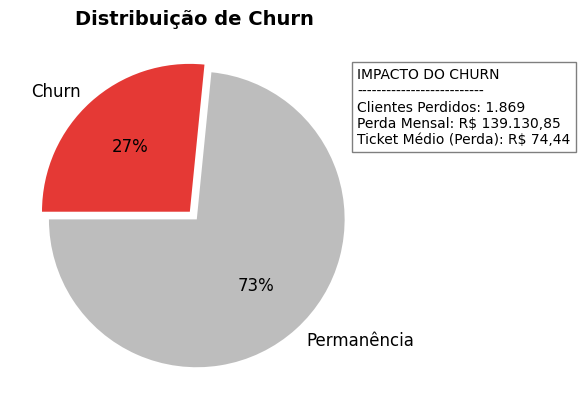

In [41]:
qtd_churn = len(df[df['Churn'] == 'Yes'])
perda_financeira = round(df[df['Churn'] == 'Yes']['Charges_Monthly'].sum(),2)

perda_formatada = f"{perda_financeira:,.2f}".replace(",", "x").replace(".", ",").replace("x", ".")
ticket_medio = f"{(perda_financeira/qtd_churn):,.2f}".replace(",", "x").replace(".", ",").replace("x", ".")
qtd_formatada = f"{qtd_churn:,.0f}".replace(",", ".")

cores = [ '#BDBDBD','#E53935']
labels = ['Permanência','Churn']

plt.pie(
    df['Churn'].value_counts(),
    labels=labels,
    autopct='%1.0f%%',
    startangle=180,
    colors = cores,
    explode = (0.02,0.05),
    textprops={'fontsize':12}
)

texto = (
    f'IMPACTO DO CHURN\n'
    f'--------------------------\n'
    f'Clientes Perdidos: {qtd_formatada}\n'
    f'Perda Mensal: R$ {perda_formatada}\n'
    f'Ticket Médio (Perda): R$ {ticket_medio}'
)
plt.text(1.1,0.5,texto,fontsize=10,
  bbox=dict(facecolor='white',alpha=0.5)
)


plt.title('Distribuição de Churn',fontsize=14,fontweight='bold')
plt.show()

### Objetivo

> Mensurar a taxa de cancelamento atual e quantificar o impacto financeiro direto que essa perda representa para o faturamento mensal da empresa.

### Dados

- Gráfico de Pizza -> Apresenta a proporção entre cliente ativos (**Permanência - 73%**) e clientes que cancelam(**Churn - 27%**).
- Painel de Impacto -> Exibe métricas absolutas,destacando que os **1869** clientes perdidos geravam uam receita de **R\$ 139.130,85 por mês**,com um ticket médio de perda de **R\$ 74,44**.

### Insight

> A taxa de churn de **27%** é considerada elevada para o setor de Telecom, mas o dado mais crítico é o impacto financeiro acumulado. A perda de mais de **R\$ 1,6 milhão por ano** (considerando a perda mensal projetada) justifica investimentos urgentes em estratégias de retenção, especialmente porque o ticket médio dos que saem **(R\$ 74,44)** indica que está perdendo clientes com valor agregado.

### Hipótese (comprovar):

- Se existe relação entre a chance de churn com o tempo de permanência e precificação.




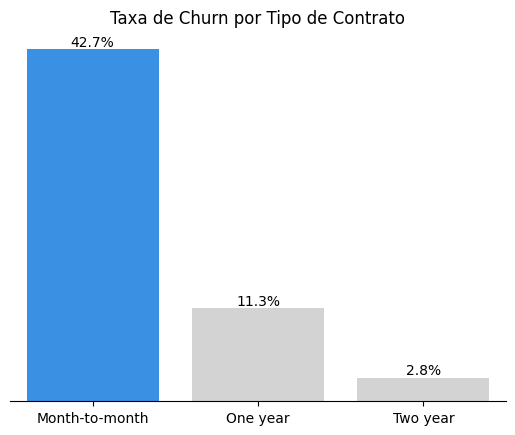

In [83]:
contratos_churn = (
    df.groupby('Contract',observed=False)['Churn']
      .value_counts(normalize=True)
      .rename('Percentual')
      .mul(100)
      .reset_index()
)

palette=['dodgerblue','lightgrey','lightgrey']

ax = sns.barplot(
    data=contratos_churn[contratos_churn['Churn'] == 'Yes']
      .sort_values(by='Percentual',ascending=False),
    x='Contract',
    y='Percentual',
    hue='Contract',
    legend=False,
    palette=palette
)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%')

plt.title('Taxa de Churn por Tipo de Contrato')
ax.set_xlabel('')
ax.set_ylabel('')
plt.yticks([])

plt.show()

In [43]:
numerador = len(df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes')])
denominador = len(df[df['Churn'] == 'Yes'])
proporcao_contract = round(numerador / denominador * 100,2)

print(f"{proporcao_contract:.2f}% dos cancelamentos vêm de contratos mensais.")
percentuais_contract = contratos_churn['Percentual'][1::2].values

risco_relativo1 = percentuais_contract[0] / percentuais_contract[1]
risco_relativo2 = percentuais_contract[0] / percentuais_contract[2]

print(f"O risco de churn no contrato mensal é {risco_relativo1:.1f} vezes maior que no de 1 ano.")
print(f"O risco de churn no contrato mensal é {risco_relativo2:.1f} vezes maior que no de 2 anos.")

88.55% dos cancelamentos vêm de contratos mensais.
O risco de churn no contrato mensal é 3.8 vezes maior que no de 1 ano.
O risco de churn no contrato mensal é 15.0 vezes maior que no de 2 anos.


### Objetivo:

> Identificar se o modelo de fidelização (prazo contratual) possui correlação direta com a retenção do cliente.

### Dados

- O contrato **Month-to-month** apresenta maior taxa de churn,ou seja,maior risco de cancelamento, (**42,7%**),enquanto contratos de **One year** e **Two year** possuem respectivamente **11,3%** e **2,8%**.
- Observa-se uma queda drástica no cancelamento conforme o tempo de compromisso contratual aumenta.
  - O risco de churn no contrato mensal é 3.8 vezes maior que no de 1 ano.
  - O risco de churn no contrato mensal é 15.0 vezes maior que no de 2 anos.

### Insight

> A falta de fidelidade é o maior preditor de churn. A estratégia deve ser **anualizar** o cliente o mais rápido possível.

### Hipóteses (Comprovar):
- A precificação associada ao prazo contratual pode ser um dos indicadores junto a qualidade dos serviços ofertados,que diminuem o nível de fidelidade.




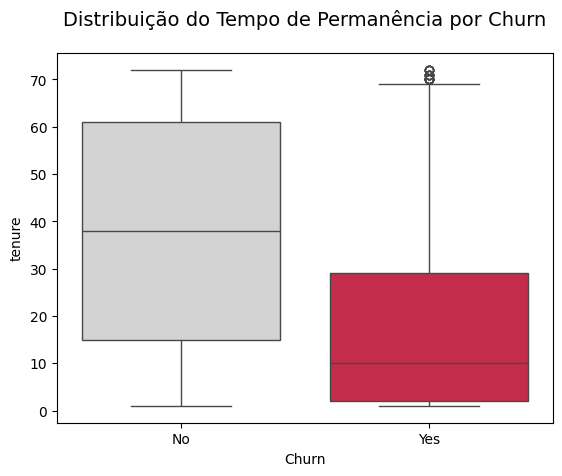

In [44]:
palette = ['lightgrey','crimson']

sns.boxplot(
    data=df,
    x='Churn',
    y='tenure',
    hue='Churn',
    palette=palette
)

plt.title('Distribuição do Tempo de Permanência por Churn',fontsize=14, pad=20)
plt.show()

In [45]:
metricas_tenure = df.groupby('Churn')['tenure'].agg(
    count='count',
    mean='mean',
    median='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    min='min',
    max='max'
)
print(metricas_tenure)


       count       mean  median    q1    q3  min  max
Churn                                                
No      5163  37.650010    38.0  15.0  61.0    1   72
Yes     1869  17.979133    10.0   2.0  29.0    1   72


### Objetivo:

> Identificar se existe um período crítico de "maturação" onde o cliente está mais propenso a cancelar o serviço.

### Dados:

- Clientes que Cancelam: A mediana do tempo de permanência é muito baixa (**aprox. 10 meses**), com uma concentração massiva de cancelamentos no primeiro ano.
- Clientes ativos: A mediana do tempo de permanência é significativamente mais alta (**aprox. 38 meses**), mostrando uma base estável a longo prazo.
- Clientes que não cancelam chegam a atingir o teto de 72 meses de casa.

### Insight:

> A maior parte da perda de receita ocorre antes mesmo do cliente completar um ano de serviço. Isso indica que a "barreira de fidelidade" é rompida logo nos primeiros meses de experiência com a marca.

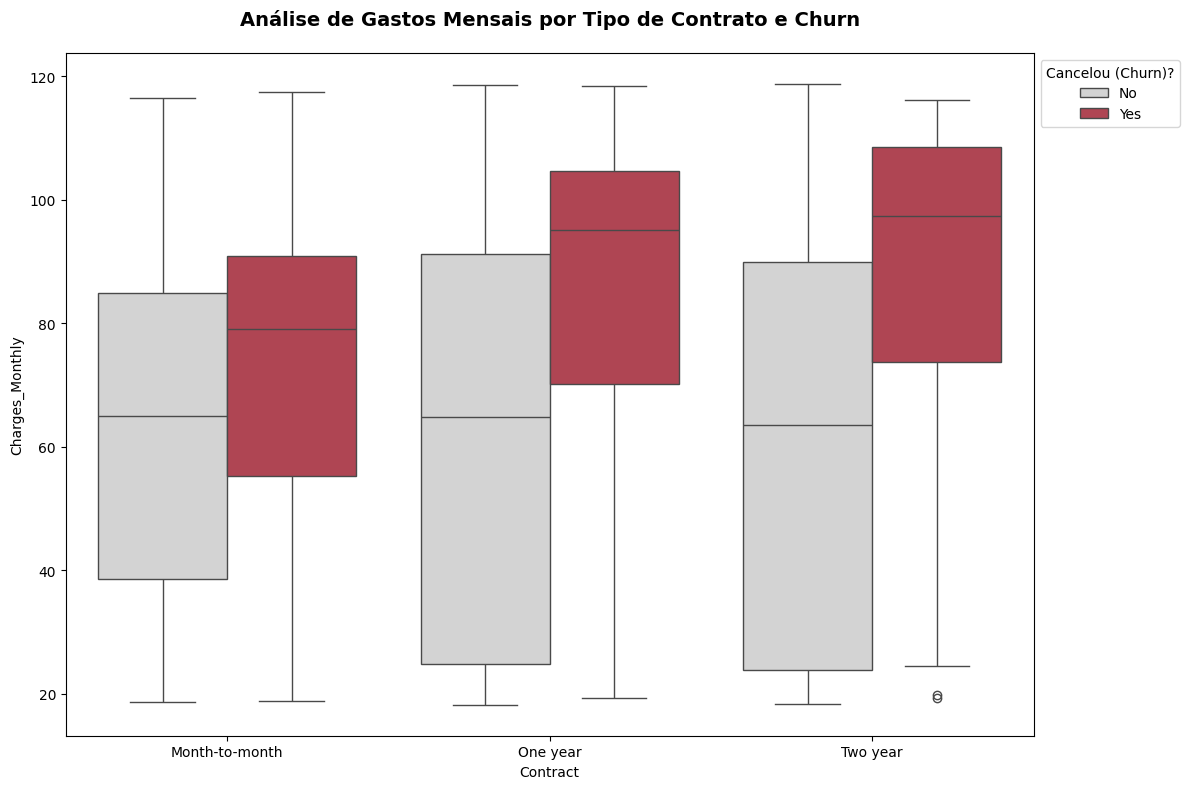

In [46]:
plt.figure(figsize=(12,8))

sns.boxplot(
    data=df,
    x='Contract',
    y='Charges_Monthly',
    hue='Churn',
    palette=['#D3D3D3', '#C13346']
)

plt.title('Análise de Gastos Mensais por Tipo de Contrato e Churn',fontsize=14, fontweight='bold', pad=20,loc='center')

plt.legend(title='Cancelou (Churn)?', loc='upper left',bbox_to_anchor=(1, 1), frameon=True)

plt.tight_layout()

plt.show()

In [47]:
mediana_permanece = df[df['Churn'] == 'No']['tenure'].median()
mediana_sai = df[df['Churn'] == 'Yes']['tenure'].median()
primeiro_quartil = df[df['Churn'] == 'Yes']['tenure'].quantile(0.25)
terceiro_quartil = df[df['Churn'] == 'Yes']['tenure'].quantile(0.75)

diferenca_mediana = mediana_permanece / mediana_sai

print(f"FIDELIDADE: O tempo de casa típico de quem fica é {diferenca_mediana:.1f} vezes maior do que quem sai.")
print(f"ALERTA PRECOCE: 25% dos clientes que cancelam, saem com apenas {primeiro_quartil:.0f} meses.")
print(f"ZONA CRÍTICA: Metade de todo o Churn ocorre entre {primeiro_quartil:.0f} e {terceiro_quartil:.0f} meses de vínculo.")


FIDELIDADE: O tempo de casa típico de quem fica é 3.8 vezes maior do que quem sai.
ALERTA PRECOCE: 25% dos clientes que cancelam, saem com apenas 2 meses.
ZONA CRÍTICA: Metade de todo o Churn ocorre entre 2 e 29 meses de vínculo.


### Objetivo:

> Analisar a relação entre o valor da fatura e o cancelmaneto dentro de cada modalidade de contrato.

### Dados:

- Em todas as categorias,a mediana,ou seja, **50%** de gastos dos clientes que cancelaram(**vermelho**) é superior à dos clientes que ficam (**cinza)**
- O grupo com maior dispersão e valores mais altos de churn está nos contratos de dois anos.

### Insght:

> Independente do tipo de contrato, o churn atinge majoritariamente os clientes com faturas mais altas daquela categoria. Isso prova que o preço é um fator de atrito em todos os níveis, não apenas no mensal.

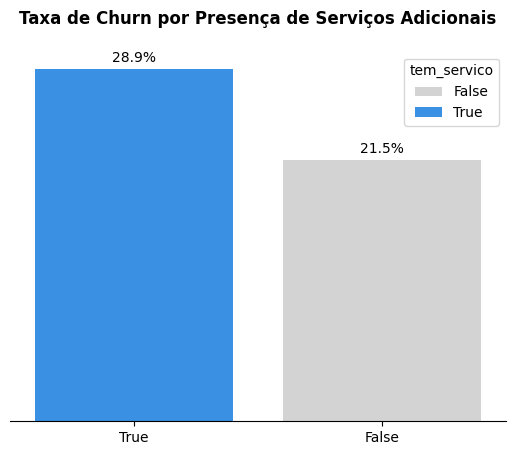

In [48]:
order = (
    df.assign(tem_servico = df['qtd_servicos'] > 0)
      .groupby('tem_servico')['Churn_num']
      .mean()
      .sort_values(ascending=False)
      .index
)

palette=['lightgrey','dodgerblue']

ax = sns.barplot(
    data=df.assign(tem_servico = df['qtd_servicos'] > 0),
    x='tem_servico',
    y='Churn_num',
    hue='tem_servico',
    order=order,
    palette=palette,
    errorbar=None
)

for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%',padding=3,labels=[f'{val*100:.1f}%' for val in i.datavalues])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Taxa de Churn por Presença de Serviços Adicionais', fontsize=12, fontweight='bold', pad=20)
ax.set_xlabel('')
ax.set_ylabel('')
plt.yticks([])
plt.show()

### Objetivo:

> Analisar se a contratação de serviços extras influencia na decisão de cancelamento do cliente.

### Dados:

- A taxa de churn entre clientes que possuem serviços adicionais é de 28,9%, enquanto para aqueles que não possuem é de 21,5%. Isso representa um aumento de 7,4 pontos percentuais (**aproximadamente 34% a mais**),no risco de evasão para clientes com serviços adicionais.

### Insight:

> Ao contrário do esperado, a taxa de cancelamento é maior entre quem tem serviços adicionais. Isso sugere que serviços específicos não estão entregando o valor esperado, gerando atrito em vez de retenção.

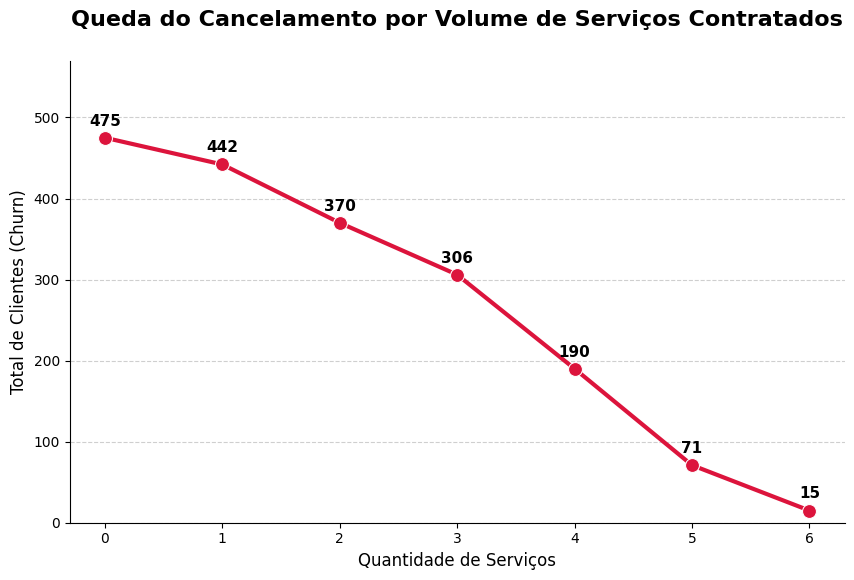

In [49]:
servicos_churn = df[df['Churn'] == 'Yes'].groupby('qtd_servicos').size().reset_index(name='qtd_clientes')

plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=servicos_churn,
    x='qtd_servicos',
    y='qtd_clientes',
    marker='o',
    markersize=10,
    color='crimson',
    linewidth=3
)

for x, y in zip(servicos_churn['qtd_servicos'], servicos_churn['qtd_clientes']):
    plt.text(x, y + 15, f'{y}', ha='center', fontweight='bold', fontsize=11)

plt.title('Queda do Cancelamento por Volume de Serviços Contratados',
          fontsize=16, fontweight='bold', pad=25)

plt.xlabel('Quantidade de Serviços', fontsize=12)
plt.ylabel('Total de Clientes (Churn)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, servicos_churn['qtd_clientes'].max() * 1.2)
sns.despine()

plt.show()

In [50]:
taxas_por_qtd = df.groupby('qtd_servicos')['Churn'].value_counts(normalize=True).unstack()['Yes']

print("--- IMPACTO DE CADA NOVO SERVIÇO NO CHURN ---")

for i in range(len(taxas_por_qtd) - 1):
    atual = taxas_por_qtd.iloc[i]
    proximo = taxas_por_qtd.iloc[i+1]

    reducao = (atual - proximo) / atual * 100

    print(f"Ao passar de {i} para {i+1} serviço(s), o risco de cancelamento cai {reducao:.1f}%.")

--- IMPACTO DE CADA NOVO SERVIÇO NO CHURN ---
Ao passar de 0 para 1 serviço(s), o risco de cancelamento cai -113.2%.
Ao passar de 1 para 2 serviço(s), o risco de cancelamento cai 21.7%.
Ao passar de 2 para 3 serviço(s), o risco de cancelamento cai 23.5%.
Ao passar de 3 para 4 serviço(s), o risco de cancelamento cai 18.4%.
Ao passar de 4 para 5 serviço(s), o risco de cancelamento cai 44.2%.
Ao passar de 5 para 6 serviço(s), o risco de cancelamento cai 57.7%.


### Objetivo:

> Verificar se existe uma correlação entre a quantidade de produtos assinados e a retenção do cliente.

### Dados:

- O gráfico mostra uma queda drástica e constante: clientes com 0 serviços adicionais somam 475 cancelamentos.
- À medida que o número de serviços aumenta, o churn cai bruscamente, chegando a apenas 15 cancelamentos para quem possui 6 serviços.
- O "ponto de virada" mais acentuado ocorre entre 1 e 3 serviços.

### Insight:

> Quanto mais serviços o cliente consome, maior é o seu "custo de saída". O ecossistema de produtos cria uma dependência positiva, tornando o churn quase inexistente em clientes que utilizam mais de 3 serviços adicionais.

In [51]:
# Exemplo: Churn entre quem tem Internet, mas NÃO tem Suporte Técnico
churn_sem_suporte = df[(df['InternetService'] != 'No') & (df['TechSupport'] == 'No')]['Churn'].value_counts(normalize=True)['Yes']

print(f"A probabilidade de churn para quem tem internet mas não tem suporte técnico é de {churn_sem_suporte*100:.1f}%.")

A probabilidade de churn para quem tem internet mas não tem suporte técnico é de 41.6%.


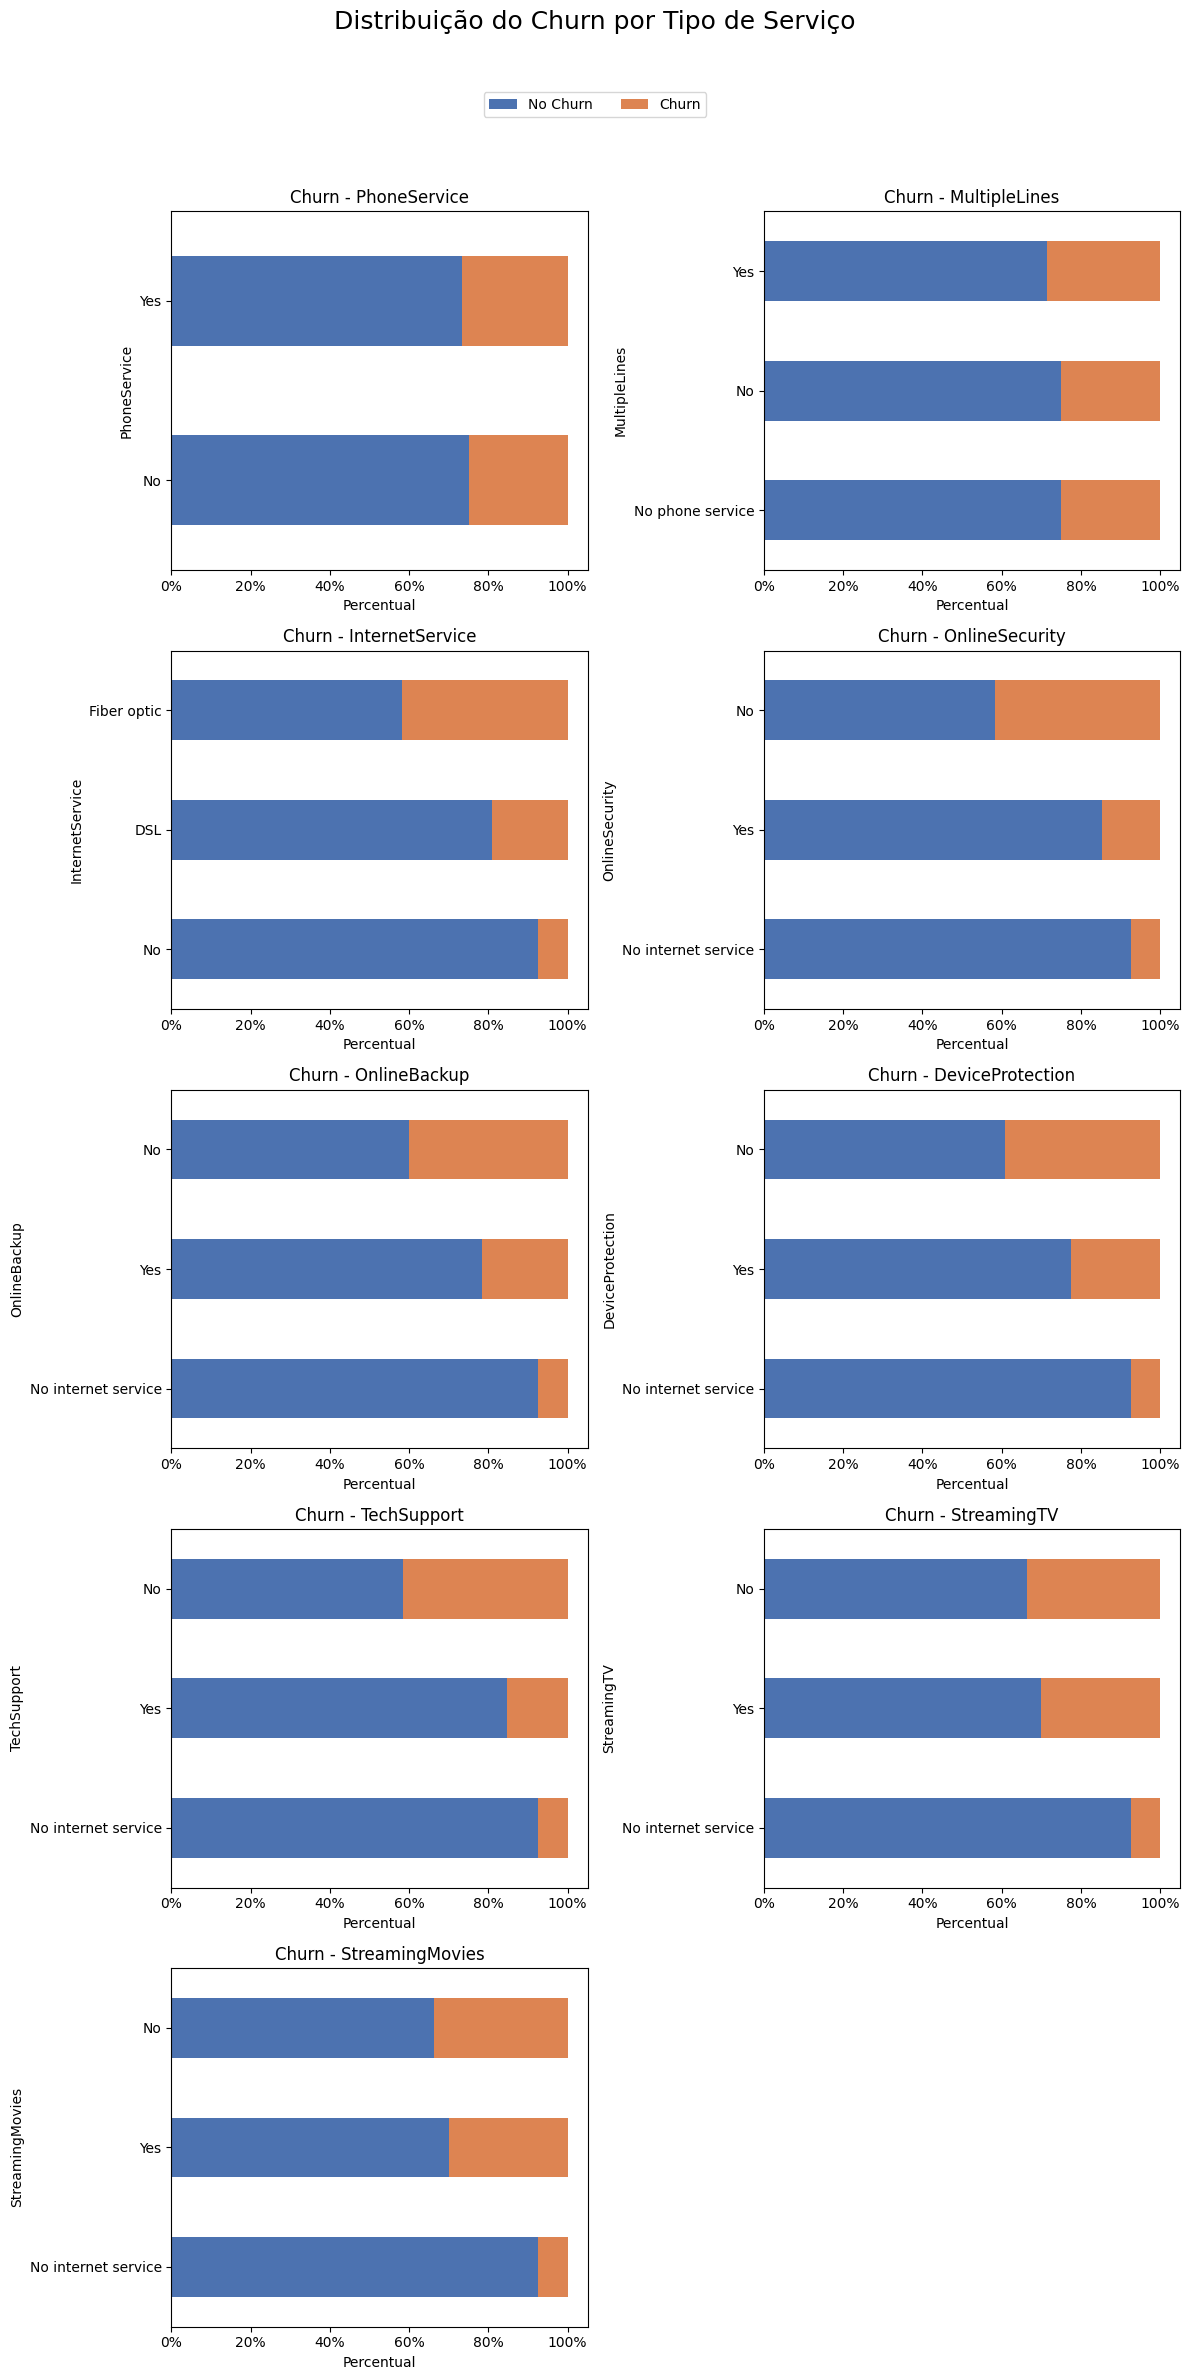

In [64]:
from matplotlib.ticker import PercentFormatter

n_colunas = 2
n_linhas = math.ceil(len(servicos)/n_colunas)

fig,axes = plt.subplots(n_linhas,n_colunas,figsize=(12,5*n_linhas))

axes = axes.flatten()

cores = ['#4C72B0', '#DD8452']

for i, servico in enumerate(servicos):

    tabela = (
        pd.crosstab(df[servico], df['Churn'], normalize='index')
        .sort_values(by='Yes')
    )

    ax = axes[i]

    tabela.plot(kind='barh', stacked=True, ax=ax, color=cores)

    ax.set_title(f'Churn - {servico}')
    ax.set_xlabel('Percentual')
    ax.xaxis.set_major_formatter(PercentFormatter(1))

    ax.get_legend().remove()

for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])


fig.legend(['No Churn', 'Churn'], loc='upper center',bbox_to_anchor=(0.5, 0.92), ncol=2)
fig.suptitle('Distribuição do Churn por Tipo de Serviço',fontsize=18,y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


### Objetivo:

> Identificar quais serviços específicos apresentam as maiores taxas de cancelamento proporcional.

### Dados:

- Serviço de Internet -> O churn é significativamente maior em clientes com Fiber optic (Fibra óptica) do que em clientes com DSL.
- Serviços de Retenção: Clientes que não possuem serviços de OnlineSecurity (Segurança Online), OnlineBackup e TechSupport (Suporte Técnico) apresentam uma proporção de churn muito mais elevada.
- Serviços de Streaming: A presença ou ausência de StreamingTV ou StreamingMovies não altera drasticamente a proporção de churn, sugerindo que esses serviços não são os principais influenciadores da fidelidade.

### Insight:

> O serviço de Fibra Óptica é o ponto de maior atrito. Além disso, a ausência de serviços de **segurança e suporte** deixa o cliente mais vulnerável ao cancelamento. Isso indica que a falta de qualidade na confiabilidade e suporte técnico da conexão,está levando os clientes mais recentes a cancelarem logo nos primeiros meses.

Hipóteses (Investigar):

- A Fibra Óptica pode estar sofrendo problemas técnicos ou ter um preço muito superior ao DSL, causando a saída dos clientes.
- Clientes que não contratam suporte técnico ou segurança podem se sentir desamparados quando ocorre um problema, optando por cancelar em vez de tentar resolver.

Text(0.5, 1.0, 'Análise de Gastos Mensais:\n Clientes de Fibra Ótica com Churn')

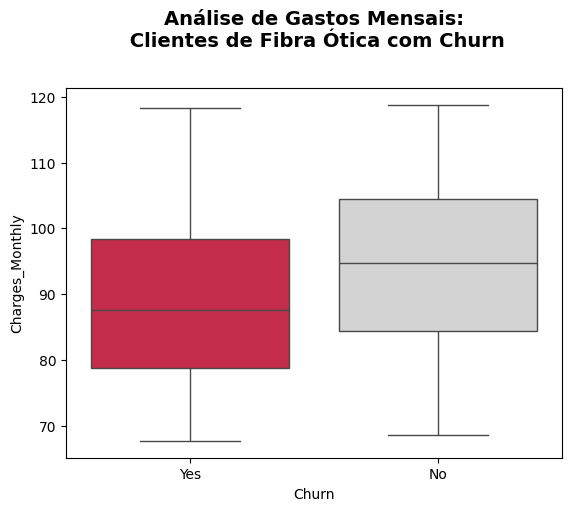

In [53]:
df_fiber_optic = df[df['InternetService'] == 'Fiber optic']

palette = ['crimson','lightgrey']

sns.boxplot(
    data=df_fiber_optic,
    x='Churn',
    y='Charges_Monthly',
    hue='Churn',
    palette=palette
)

plt.title('Análise de Gastos Mensais:\n Clientes de Fibra Ótica com Churn',fontsize=14,pad=30,loc='center',fontweight='bold')


In [74]:
metricas_tenure = df[df['InternetService'] == 'Fiber optic'].groupby('Churn')['Charges_Monthly'].agg(
    count='count',
    mean='mean',
    median='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    min='min',
    max='max'
)
print(metricas_tenure)


       count       mean  median    q1     q3    min     max
Churn                                                      
No      1799  93.932379   94.80  84.4  104.4  68.60  118.75
Yes     1297  88.126484   87.55  78.8   98.4  67.75  118.35


### Objetivo:

> Validar se o valor da fatura é o real motivador do cancelamento dentro do segmento de Fibra Óptica.

### Dados:

- Clientes ativos apresentam uma mediana de gastos superior, aproximadamente R\$ 95,00.
- Clientes que cancelam apresentam uma mediana de gastos inferior, aproximadamente R\$ 87,00.
  - Observação: O limite superior (terceiro quartil) de quem permanece chega a patamares mais elevados (R\$ 105,00+) do que o de quem cancela.

### Insight:

> Diferente do padrão observado nos outros tipos de contrato, na Fibra Óptica o preço alto não é o culpado pelo Churn. Os clientes que geram as maiores faturas neste segmento são, na verdade, os mais fiéis. O cancelamento está concentrado em clientes com faturas menores, o que sugere que o problema na fibra está na percepção de valor ou na qualidade da entrega para planos de entrada, e não no valor absoluto da conta.

In [54]:

mediana_permanece,mediana_saiu = df_fiber_optic.groupby('Churn')['Charges_Monthly'].median().values


print(f"--- ANALISE DE PREÇO: FIBRA ÓPTICA ---")
print(f"Preço típico (mediana) de quem cancelou: R$ {mediana_saiu:.2f}")
print(f"Preço típico (mediana) de quem permaneceu: R$ {mediana_permanece:.2f}")
print(f"Ou seja, a diferença de preço entre ficar e sair é de apenas R$ {mediana_permanece - mediana_saiu:.2f}")

--- ANALISE DE PREÇO: FIBRA ÓPTICA ---
Preço típico (mediana) de quem cancelou: R$ 87.55
Preço típico (mediana) de quem permaneceu: R$ 94.80
Ou seja, a diferença de preço entre ficar e sair é de apenas R$ 7.25


<Figure size 1200x800 with 0 Axes>

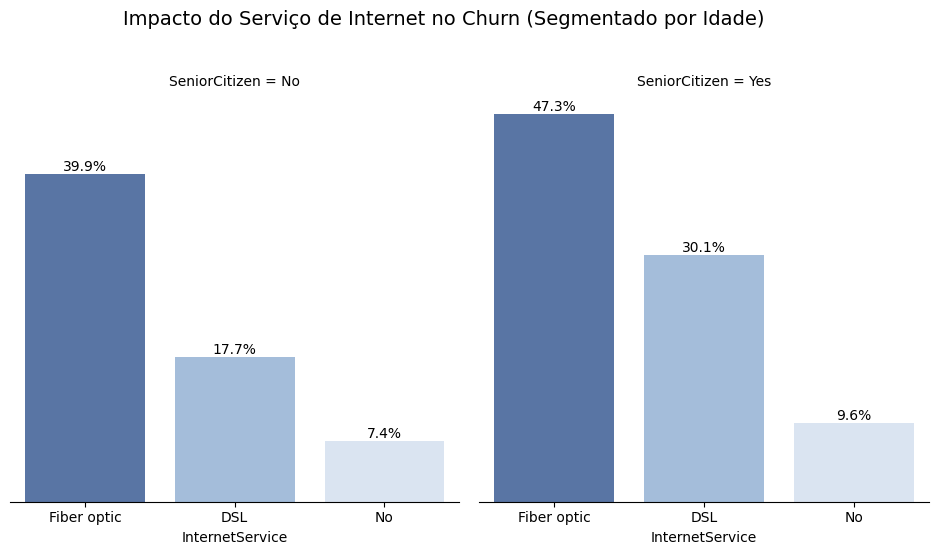

In [75]:
order = (
    df.groupby('InternetService',observed=False)['Churn_num']
      .mean()
      .sort_values(ascending=False)
      .index
)


palette = ['#9BBCE3','#4C72B0', '#D6E4F5']

plt.figure(figsize=(12,8))
ax = sns.catplot(
    data=df,
    x='InternetService',
    y='Churn_num',
    col='SeniorCitizen',
    kind='bar',
    hue='InternetService',
    order=order,
    palette=palette,
    errorbar=None,
)


for ax in ax.axes.flat:
  ax.spines['left'].set_visible(False)
  ax.set_ylabel('')
  ax.set_yticks([])
  for container in ax.containers:
        labels = [f'{v.get_height()*100:.1f}%' for v in container]
        ax.bar_label(container, labels=labels)

ax.figure.suptitle('Impacto do Serviço de Internet no Churn (Segmentado por Idade)',fontsize=14,y=1.1)
plt.show()

### Objetivo:

> Analisar como o tipo de serviço de internet influencia a taxa de churn, considerando a segmentação por idade (idosos vs. não idosos).

### Dados:

- A Fibra Óptica apresenta a maior taxa de churn em ambos os segmentos etários.
- A taxa de churn na Fibra aumenta de 39,9% para 47,3% entre idosos, um acréscimo de 7,4 pontos percentuais, o que representa um aumento relativo de aproximadamente **18,5%**.
- No serviço DSL, a taxa de churn sobe de 17,7% entre não idosos para 30,1% entre idosos, representando um aumento de 12,4 pontos percentuais — aproximadamente **70%** a mais no risco de cancelamento nesse segmento.
- Clientes sem serviço de internet apresentam as menores taxas de cancelamento em ambos os grupos.

### Insight:

> Existe um problema relevante de retenção na Fibra Óptica direcionado ao público idoso. Enquanto clientes mais jovens demonstram maior estabilidade no serviço, o segmento sênior apresenta propensão significativamente maior ao cancelamento. Esse comportamento indica que a Fibra, embora seja a tecnologia mais avançada, pode estar impondo barreiras específicas para esse público — seja por sensibilidade ao preço, dificuldades operacionais ou menor percepção de benefício real.

### Hipóteses (comprovar):

- Clientes idosos sem dependentes/partners que não possuem o serviço de TechSupport contratado têm a maior probabilidade de churn, pois não possuem auxílio (interno ou externo) para lidar com a complexidade da Fibra Óptica.


In [56]:
taxa_senior_citizen = [
    df[(df['SeniorCitizen'] == 'Yes') & (df['InternetService'] == 'Fiber optic')]['Churn_num'].mean(),
    df[(df['SeniorCitizen'] == 'No') & (df['InternetService'] == 'Fiber optic')]['Churn_num'].mean(),
    df[(df['SeniorCitizen'] == 'Yes') & (df['InternetService'] == 'DSL')]['Churn_num'].mean(),
    df[(df['SeniorCitizen'] == 'No') & (df['InternetService'] == 'DSL')]['Churn_num'].mean(),
]

diferenca_percentual = [
    (taxa_senior_citizen[0] / taxa_senior_citizen[1] - 1) * 100,
    (taxa_senior_citizen[2] / taxa_senior_citizen[3] - 1) * 100
]

print(f'--- ANÁLISE DE IMPACTO: FIBRA ÓPTICA / SeniorCitizen ---')
print(f'Taxa de Churn (Jovens): {taxa_senior_citizen[1]:.2%}')
print(f'Taxa de Churn (Idosos): {taxa_senior_citizen[0]:.2%}')
print(f'O risco de cancelamento na Fibra é {diferenca_percentual[0]:.2f}% MAIOR para clientes idosos.')
print('\n')
print(f'--- ANÁLISE DE IMPACTO: DSL / SeniorCitizen ---')
print(f'Taxa de Churn (Jovens): {taxa_senior_citizen[3]:.2%}')
print(f'Taxa de Churn (Idosos): {taxa_senior_citizen[2]:.2%}')
print(f"O risco de cancelamento no DSL é {diferenca_percentual[1]:.2f}% MAIOR para clientes idosos.")

--- ANÁLISE DE IMPACTO: FIBRA ÓPTICA / SeniorCitizen ---
Taxa de Churn (Jovens): 39.91%
Taxa de Churn (Idosos): 47.29%
O risco de cancelamento na Fibra é 18.49% MAIOR para clientes idosos.


--- ANÁLISE DE IMPACTO: DSL / SeniorCitizen ---
Taxa de Churn (Jovens): 17.66%
Taxa de Churn (Idosos): 30.12%
O risco de cancelamento no DSL é 70.50% MAIOR para clientes idosos.


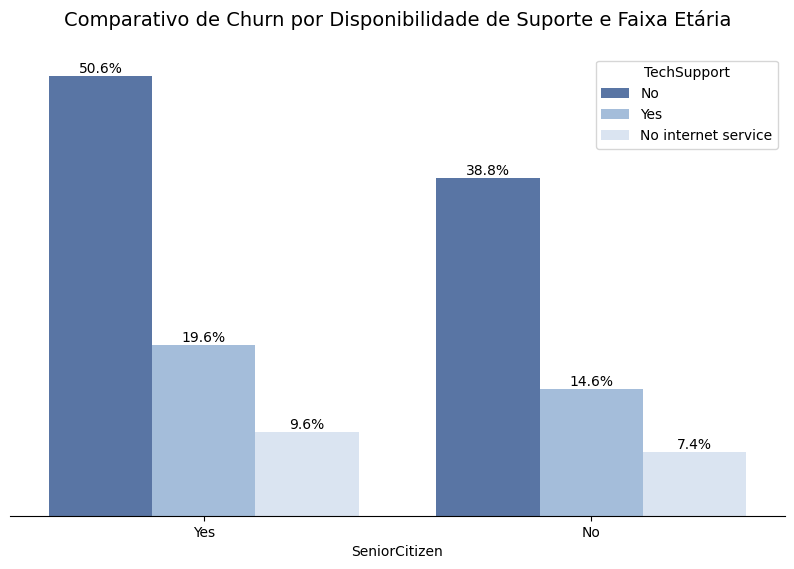

In [57]:
hue_order = (
    df.groupby('TechSupport',observed=False,)['Churn_num']
      .mean()
      .sort_values(ascending=False)
      .index
)

order = (
    df.groupby('SeniorCitizen')['Churn_num']
      .mean()
      .sort_values(ascending=False)
      .index
)

palette = ['#4C72B0', '#9BBCE3', '#D6E4F5']

plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=df,
    x='SeniorCitizen',
    y='Churn_num',
    hue='TechSupport',
    order=order,
    hue_order=hue_order,
    palette=palette,
    errorbar=None
)

for i in ax.containers:
  labels = [f'{v.get_height()*100:.1f}%' for v in i]
  ax.bar_label(i,labels=labels)

for i in ['top','left','right']:
  ax.spines[i].set_visible(False)

ax.set_ylabel('')
ax.set_yticks([])
plt.title('Comparativo de Churn por Disponibilidade de Suporte e Faixa Etária',fontsize=14,pad=20)

plt.show()



### Objetivo:

> Validar a hipótese de que a ausência de suporte técnico especializado é o principal gatilho de churn para o público idoso, que pode não ter uma rede de apoio familiar para resolver problemas de conectividade.

### Dados:

- Mesmo que o TechSupport reduza o churn em cerca de 60% em ambos os grupos, o idoso parte de um patamar muito mais alto de risco.
  - Idoso sem suporte: 50,6%
  - Não idoso sem suporte: 38,8%

### Insight:

> O TechSupport atua como o principal fator de retenção para idosos. Para este grupo, a tecnologia (especialmente a Fibra Óptica, como vimos anteriormente) pode ser intimidadora ou apresentar falhas que eles não conseguem contornar sozinhos. Sem o suporte da empresa, o sentimento de desamparo técnico leva ao cancelamento imediato em 1 de cada 2 casos.

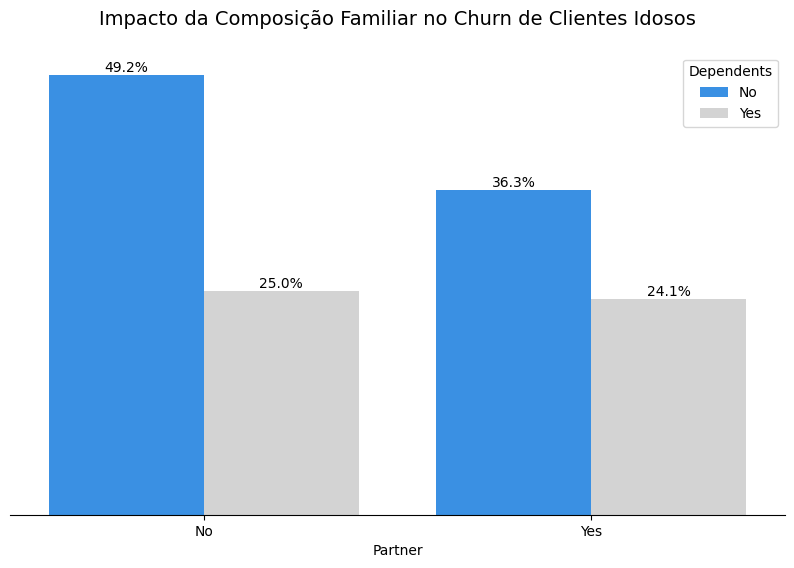

In [59]:
order = (
    df.groupby('Partner',observed=False)['Churn_num']
      .mean()
      .sort_values(ascending=False)
      .index
)

palette=['dodgerblue','lightgrey']

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=df[df['SeniorCitizen'] == 'Yes'],
    x='Partner',
    y='Churn_num',
    hue='Dependents',
    order=order,
    errorbar=None,
    palette=palette
)

for i in ax.containers:
  labels=[f'{v.get_height()*100:.1f}%' for v in i]
  ax.bar_label(i,labels=labels)

for i in ['top','left','right']:
  ax.spines[i].set_visible(False)
ax.set_ylabel('')
ax.set_yticks([])
plt.title('Impacto da Composição Familiar no Churn de Clientes Idosos',fontsize=14,pad=20)

plt.show()


In [80]:
churn_senior = df[df['SeniorCitizen'] == 'Yes'].groupby(['Partner', 'Dependents'])['Churn_num'].mean().mul(100)

risco_sozinho = churn_senior.loc[('No', 'No')]

risco_parceiro = churn_senior.loc[('Yes', 'No')]

risco_completo = churn_senior.loc[('Yes', 'Yes')]

reducao_parceiro = ((risco_sozinho - risco_parceiro) / risco_sozinho) * 100
reducao_total = ((risco_sozinho - risco_completo) / risco_sozinho) * 100

print("--- Análise de Impacto na Retenção (Idosos) ---")
print(f"Risco base (Vive sozinho): {risco_sozinho:.1f}%")
print(f"Risco com apenas parceiro: {risco_parceiro:.1f}%")
print(f"Redução ao ter parceiro: ~{reducao_parceiro:.0f}%")
print(f"Risco cenário favorável (Parceiro + Dependentes): {risco_completo:.1f}%")
print(f"Redução total observada: ~{reducao_total:.0f}%")

--- Análise de Impacto na Retenção (Idosos) ---
Risco base (Vive sozinho): 49.2%
Risco com apenas parceiro: 36.3%
Redução ao ter parceiro: ~26%
Risco cenário favorável (Parceiro + Dependentes): 24.1%
Redução total observada: ~51%


In [60]:
df[df['SeniorCitizen'] == 'Yes']['Partner'].value_counts(normalize=True).mul(100).apply(lambda x: round(x,2) )

,proportion
Partner,
Yes,50.18
No,49.82


### Objetivo:

> Testar a hipótese de que a solidão e a falta de uma rede de apoio familiar são fatores determinantes para o cancelamento entre idosos.

### Dados:

- Aqueles que vivem sozinhos,ou seja,sem depententes e parceiro, apresentam um risco de cancelamento significativamente maior (**26,2%**).
- Ter apenas um parceiro já reduz consideravelmente esse risco (**diminuição de ~49%**) para **25%**.
- A presença de dependentes reduz ainda mais a probabilidade de churn (**diminuição de ~50%**).
- No cenário mais favorável — com parceiro e dependentes — o risco de cancelamento cai para cerca da metade do observado entre idosos que vivem sozinhos.

### Insight:

> A composição familiar exerce forte influência sobre o churn entre idosos. Quanto menor a rede de apoio dentro do domicílio, maior o risco de cancelamento

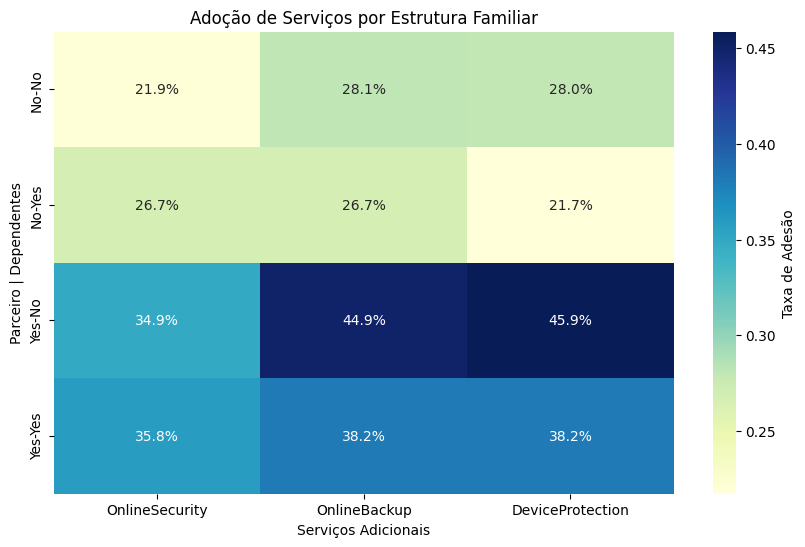

In [61]:

servicos_familiares = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection']

df_copia = df.copy()
for servico in servicos_familiares:
    df_copia[servico] = df_copia[servico].apply(lambda x: 1 if x == 'Yes' else 0)

matriz_familia = df_copia.groupby(['Partner', 'Dependents'])[servicos_familiares].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(matriz_familia,
            annot=True,
            cmap='YlGnBu',
            fmt='.1%',
            cbar_kws={'label': 'Taxa de Adesão'})

plt.title('Adoção de Serviços por Estrutura Familiar')
plt.ylabel('Parceiro | Dependentes')
plt.xlabel('Serviços Adicionais')
plt.show()

### Objetivo:

>

### Dados:

- Clientes sem parceiro e sem dependentes apresentam os menores níveis de adesão aos serviços complementares (segurança online,em especial por possuir o menor prcentual,backup e proteção de dispositivo).
- Já entre aqueles que possuem parceiro, especialmente quando também têm dependentes, a adesão cresce de forma consistente, aproximando-se de 40% ou mais em serviços como backup e proteção de dispositivo.
-> O maior salto ocorre entre clientes com parceiro e sem dependentes, que apresentam as taxas mais elevadas de adoção, superando significativamente os demais grupos.

### Insight:

> Nota-se uma desproteção digital para quem mora sozinho,clientes solitários não apenas carecem de uma rede de apoio humana como percebe-se em gráficos anteriores, mas também não possuem as ferramentas digitais (OnlineSecurity, DeviceProtection) que evitariam problemas técnicos.

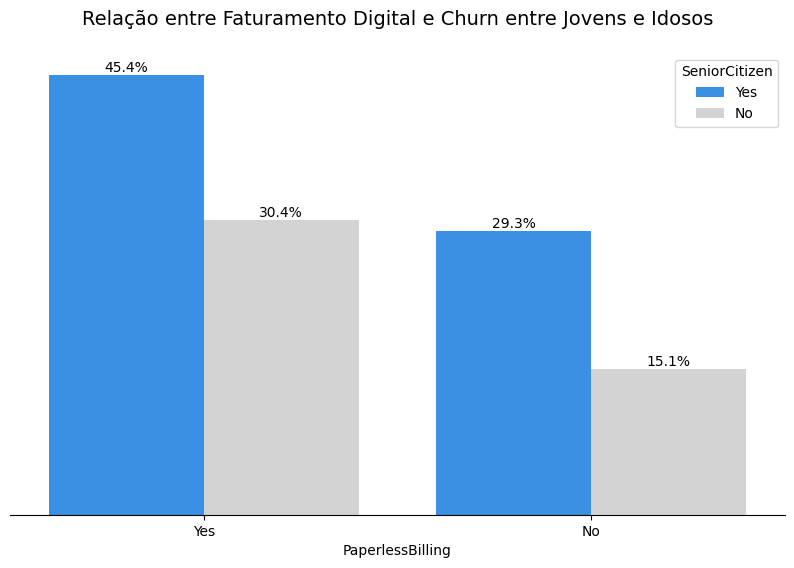

In [62]:
hue_order = (
    df.groupby('SeniorCitizen')['Churn_num']
      .mean()
      .sort_values(ascending=False)
      .index
)

palette=['dodgerblue','lightgrey']

plt.figure(figsize=(10,6))
ax = sns.barplot(
      data=df,
      x='PaperlessBilling',
      y='Churn_num',
      hue='SeniorCitizen',
      hue_order=hue_order,
      errorbar=None,
      palette=palette
)

for i in ax.containers:
  labels=[f'{v.get_height()*100:.1f}%' for v in i]
  ax.bar_label(i,labels=labels)

for i in ['top','left','right']:
  ax.spines[i].set_visible(False)

ax.set_ylabel('')
ax.set_yticks([])

plt.title('Relação entre Faturamento Digital e Churn entre Jovens e Idosos',fontsize=14,pad=20)
plt.show()

### Objetivo:

> Avaliar se a modalidade de cobrança digital influencia a retenção, especialmente no público idoso, que pode ter maior dificuldade com canais digitais.

### Dados

- Dos clientes que cancelaram o grupo que mais se destacou foram os idosos que aderiram ao recebimento da fatura online (**~45%**)
- Entre idosos que preferem dos que não optam por receber a fatura online há um aumento de aproximadamente 55% de cancelamneto.
-> Melhor

### Insight:

> Quase metade dos idosos que não recebem a conta física cancelam o serviço. Isso sugere que a "digitalização" forçada pode estar gerando ansiedade, esquecimento de pagamento ou dificuldade de conferência de valores, levando à insatisfação.

### Hipóteses (comprovar):

- Esquecimento e Inadimplência ->  Sem o lembrete físico, o atraso no pagamento pode gerar multas e suspensões automáticas que geram atrito e resultam em churn reativo (o cliente cancela após ter o serviço cortado).

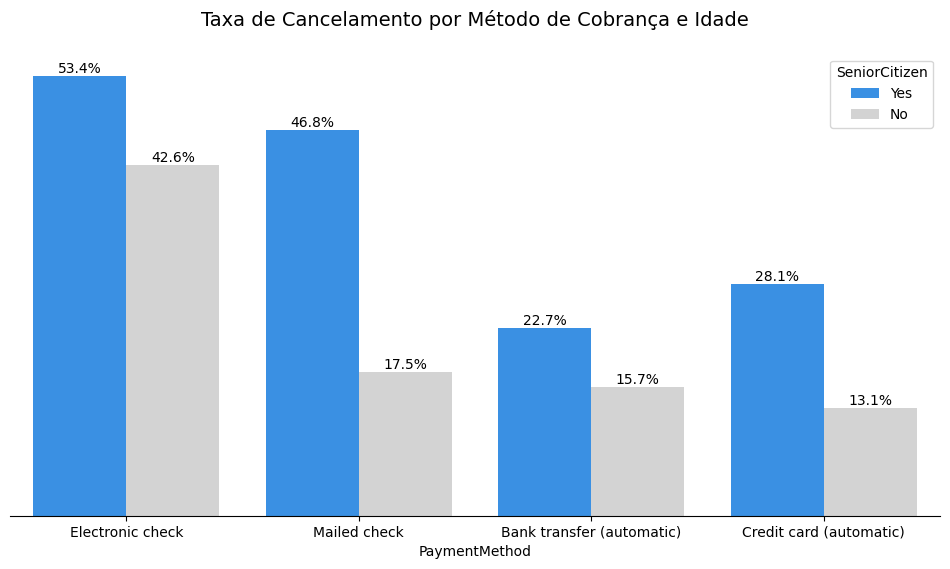

In [63]:
hue_order = (
    df.groupby('SeniorCitizen',observed=False)['Churn_num']
      .mean()
      .sort_values(ascending=False)
      .index
)

order = (
    df.groupby('PaymentMethod',observed=False)['Churn_num']
      .mean()
      .sort_values(ascending=False)
      .index
)

palette=['dodgerblue','lightgrey']

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=df,
    x='PaymentMethod',
    y='Churn_num',
    hue='SeniorCitizen',
    order=order,
    hue_order=hue_order,
    errorbar=None,
    palette=palette
)

for i in ax.containers:
  labels=[f'{v.get_height()*100:.1f}%' for v in i]
  ax.bar_label(i,labels=labels)

for i in ['top','left','right']:
  ax.spines[i].set_visible(False)

ax.set_ylabel('')
ax.set_yticks([])
plt.title('Taxa de Cancelamento por Método de Cobrança e Idade',fontsize=14,pad=20)
plt.show()


### Objetivo

> valiar se a modalidade de cobrança influencia a retenção de forma distinta entre jovens e idosos.

### Dados:

- O Electronic check representa o cenário mais crítico: **53,4%** dos idosos cancelam, contra 42,6% dos não idosos, um churn aproximadamente 25% maior entre idosos.
- No Mailed check, a diferença se torna estruturalmente preocupante: 46,8% dos idosos cancelam, enquanto apenas 17,5% dos não idosos fazem o mesmo. Isso significa que o risco de churn entre idosos é cerca de 167% maior nesse método.
- Mesmo nos modelos automáticos, a vulnerabilidade persiste.
- Na transferência bancária automática, o churn dos idosos (22,7%) é aproximadamente 45% maior que o dos não idosos (15,7%).
- No cartão de crédito automático, o cancelamento entre idosos (28,1%) é cerca de 114% maior que entre não idosos (13,1%).

### Insight

> **Pagamentos manuais** (Electronic check e Mailed check) concentram as maiores taxas de cancelamento, ultrapassando metade da base idosa no caso do Electronic check. Já os métodos automáticos apresentam taxas consideravelmente menores.

# 📌 Recomendações Estratégicas



### 🎯 Público-Alvo
Identifiquei que o cancelamento não é aleatório, mas concentrado num perfil específico que necessita de atenção prioritária:

* **👥 Perfil:** Clientes idosos, com foco especial naqueles que vivem sozinhos (sem parceiros ou dependentes).
* **💡 Comportamento:** Utilizadores de **Fibra Ótica** com planos de entrada (faturas médias de R$ 87,00) e baixa adesão a serviços de segurança/suporte.
* **📍 Segmento relevante:** Clientes com contratos **mensais (Month-to-month)** e que utilizam fatura digital (**Paperless Billing**).

---

### 🌎 Cenário Atual
A análise revelou que a tecnologia de ponta, sem o devido acompanhamento, gera frustração neste segmento:

* **⚠️ Problema / Oportunidade:** Existe uma vulnerabilidade crítica no público idoso. A taxa de cancelamento atinge **50%** quando não possuem suporte técnico e **49%** quando não possuem rede de apoio familiar.
* **📊 Evidências observadas:** O *Churn* cai drasticamente para ~20% quando o serviço de **TechSupport** está presente. Além disso, o faturamento digital atua como um ponto de atrito para o idoso, elevando o cancelamento em comparação com a fatura em papel.
* **🔎 Possíveis causas:** A complexidade da Fibra Ótica, somada à falta de auxílio (doméstico ou profissional), leva o cliente a desistir do serviço perante qualquer dificuldade técnica ou de faturação.

---

### 🚀 Próximos Passos Recomendados

✅ **Ações de Curto Prazo**
* **📞 Suporte Proativo:** Oferecer 3 meses gratuitos de *TechSupport* para clientes seniores que possuem apenas internet.
* **🎁 Degustação de Segurança:** Libertar os serviços de *OnlineSecurity* e *DeviceProtection* para clientes de Fibra que moram sozinhos, aumentando o "valor percebido".
* **💳 Automação do Pagamento:** Incentivar a migração do *Electronic Check* para o **Débito Direto ou Cartão**, eliminando a necessidade de o idoso realizar o processo manual de pagamento todos os meses.
* **📄 Opção de Fatura:** Oferecer o retorno à **Fatura em Papel** para idosos. O documento físico reduz a ansiedade digital e serve como lembrete visual, combatendo o churn do faturamento digital.

✅ **Ações de Médio Prazo**
* **🧠 Ajuste na Venda:** Formar a equipa comercial para não vender apenas "velocidade", mas sim "combos de assistência" para o público sênior.
* **🔄 Revisão de Planos:** Criar o plano **"Sênior Seguro"**, que já inclua suporte e segurança no valor da mensalidade (ajustado à mediana de retenção de R$ 95,00).
* **📈 Régua de Relacionamento:** Criar um fluxo de comunicação pós-venda focado em ensinar o cliente a utilizar os canais de suporte e a app da empresa.

✅ **Ações de Longo Prazo**
* **🏗️ Melhorias Estruturais:** Adaptar a UX/UI dos canais digitais para garantir acessibilidade total ao público idoso.
* **🤖 Modelos Preditivos:** Integrar o modelo de Machine Learning para identificar o "Idoso Solitário" no momento da adesão e disparar ações preventivas de retenção.
* **💎 Programa de Fidelidade:** Criar benefícios por tempo de casa que incluam upgrades em serviços de entretenimento (streaming) para reduzir o churn após o primeiro ano.

---